## 04_03: Exploit class inheritance

In [1]:
import math
import random

In [2]:
from turtle import Turtle, Terrarium

In [3]:
def polyspi(t, side, angle):
    if side > 0:
        t.forward(side)
        t.right(angle)
        polyspi(t, side-2, angle)

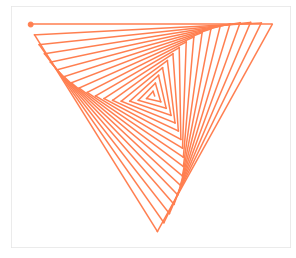

In [4]:
with Terrarium() as t:
    t1 = Turtle(t, 'coral')

    t1.point(1)
    polyspi(t1, 100, 119)

In [5]:
# pass javascript=False to make movie as HTML5 instead of Javascript

with Terrarium(animate=True) as t:
    t1 = Turtle(t, 'coral')

    t1.point(1)
    polyspi(t1, 100, 129)

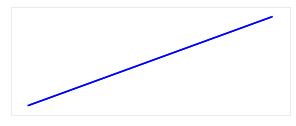

In [6]:
with Terrarium() as t:
    t1 = Turtle(t)
    
    t1.left(20)
    for i in range(200):
        t1.forward(1)

In [7]:
class ShakyTurtle(Turtle):
    def forward(self, distance):
        self.right(random.uniform(-10, 10))
        super().forward(random.uniform(0.75, 1.25) * distance)

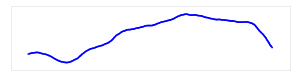

In [8]:
with Terrarium() as t:
    t1 = ShakyTurtle(t)
    
    t1.left(20)
    for i in range(200):
        t1.forward(1)

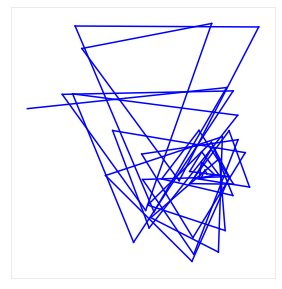

In [9]:
with Terrarium() as t:
    t1 = ShakyTurtle(t)
    
    polyspi(t1, 100, 119)

In [10]:
class ShakyTurtle(Turtle):
    def __init__(self, t, col='b', shakiness=10):
        super().__init__(t, col)
        self.shakiness = shakiness
    
    def forward(self,distance):
        self.right(random.uniform(-1, 1) * self.shakiness)
        super().forward(random.uniform(0.75, 1.25) *  distance)

In [11]:
with Terrarium(animate=True) as t:
    t1 = ShakyTurtle(t, 'navy', 5)
    t2 = ShakyTurtle(t, 'coral', 10)
    t3 = ShakyTurtle(t, 'seagreen', 50)
    
    for i in range(200):
        for ti in [t1,t2,t3]:
            ti.forward(1)

In [12]:
class PredatorTurtle(ShakyTurtle):
    def follow(self, prey, distance):
        dx, dy = prey.pos[0] - self.pos[0], prey.pos[1] - self.pos[1]
        angle_to_prey = math.atan2(dy, dx) / self.deg - self.angle
        
        self.left(angle_to_prey)
        self.forward(distance)

In [13]:
with Terrarium(animate=True) as t:
    t1 = ShakyTurtle(t, 'navy', 20)
    t2 = PredatorTurtle(t, 'coral', 10)
    
    for i in range(200):
        t1.forward(1)
        t2.follow(t1, 0.75)
        
    t1.point(); t2.point()

In [14]:
def move(turtle, x, y):
    turtle.pos = (x,y)
    
Turtle.move = move

In [15]:
with Terrarium(animate=True) as t:
    t1 = ShakyTurtle(t, 'navy', 20)
    t2 = PredatorTurtle(t, 'coral', 10)
    
    t1.move(75, 75)
    
    for i in range(200):
        t1.forward(1)
        t2.follow(t1, 0.75)
        
    t1.point(); t2.point()